# Week 1: Spark for Data Engineering

**Common Structured Streaming Terms:**

* Source: The data origination location
* Sink: The location of the output
* Event Time: The record creation time
* The measurement of the time needed for the data to go from source to sink
* Manages late arriving data (allows for handling data that is older than already processed data and would be out of sequence for streaming)

**Streaming Data Sources:**

* Files
* Kafka
* IP Sockets and Rate Sources (for testing only)


**Streaming Data Operations:**

* Performs Standard SQL operations including select, projection, and aggregation
* Enables window operations over event time - sliding windows with aggregations
*Supports join operations - joins with static DataFrames or other streams

**Output Modes:**

* Append - Only new rows added
* Complete - Entire result table (Overwrite)
* Update - Only updated rows

**Streaming Data Sinks:**

Files: Output Files to a Directory
Kafka: Outputs to Kafka Topics
Foreach & ForeachBatch: Applies a function to each record or batch
Console and Memory: Used for Debugging

**Graph Theory:**

Directed Graphs:

* Contain edges with a single direction between two vertices
    
  Examples:
    * manufacturing optimization
    * project scheduling
    * Train and airline route analysis
    * traffic recommendations
Undirected Graphs:

* Contain edges with no defined directions

  Examples:
  * Social relationship analysis
  * Marketing analysis
  * Genomics analysis
  * knowledge repositories

**Graph Frames:**

An Extension to Spark that allows graph processing/analysis
* Based on Spark Dataframes
* Runs queries on graphs of vertices and edges and represents data
* Contains built-in algorithms
* Exists as a separate, downloadable package


**ETL with Spark:**
* Provides a well-supported big data ecosystem
* Can easily load and save popular big data sources
* Scales easily to handle large workloads

**Load sources for Spark:**
* Parquet
* Apache ORC
* Hive
* JDBC
* Others

**Transforming data for Spark:**

* Cleans the data
* Transforms data format to make the data more accessible for analysis
* Joins DataFrames
* Groups and aggregates data
* Uses Spark SQL operations to Select

In [ ]:
#example code:

# Create view of data for SQL queries
df.createOrReplaceTempView("people")

# Use Spark SQL to clean and transform data
names = spark.sql("SELECT name FROM people WHERE age BETWEEN 13 AND 19")

**Loading Data with Spark:**
* Loads data into data warehouse, database or other data sink
* Uses available Spark data sources

In [ ]:
#example code:

# Ensure PostgreSQL driver is added to application classpath
./bin/spark-shell \--jars postgresql-9.4.1207.jar

# Load the DataFrame to PostgreSQL
jdbcDF.write
  .format ("jdbc")
  .option ("url", "jabc: postgresq1: dbserver")
  .option ("dbtable")
  .schema. tablename")
  .option ("user", "username");
  .option ("password","password")
  .save ()

**ETL Example:**
* The first data source extracts a Parquet file to create a DataFrame with a “Name” column.
* The next data source extracts other information, such as age, from a database into a second DataFrame.
* Data stored in the “Name” column is cleaned and transformed into two columns to separate first and last names.
* These two DataFrames are then joined and loaded into the data warehouse for further analysis using the new format.


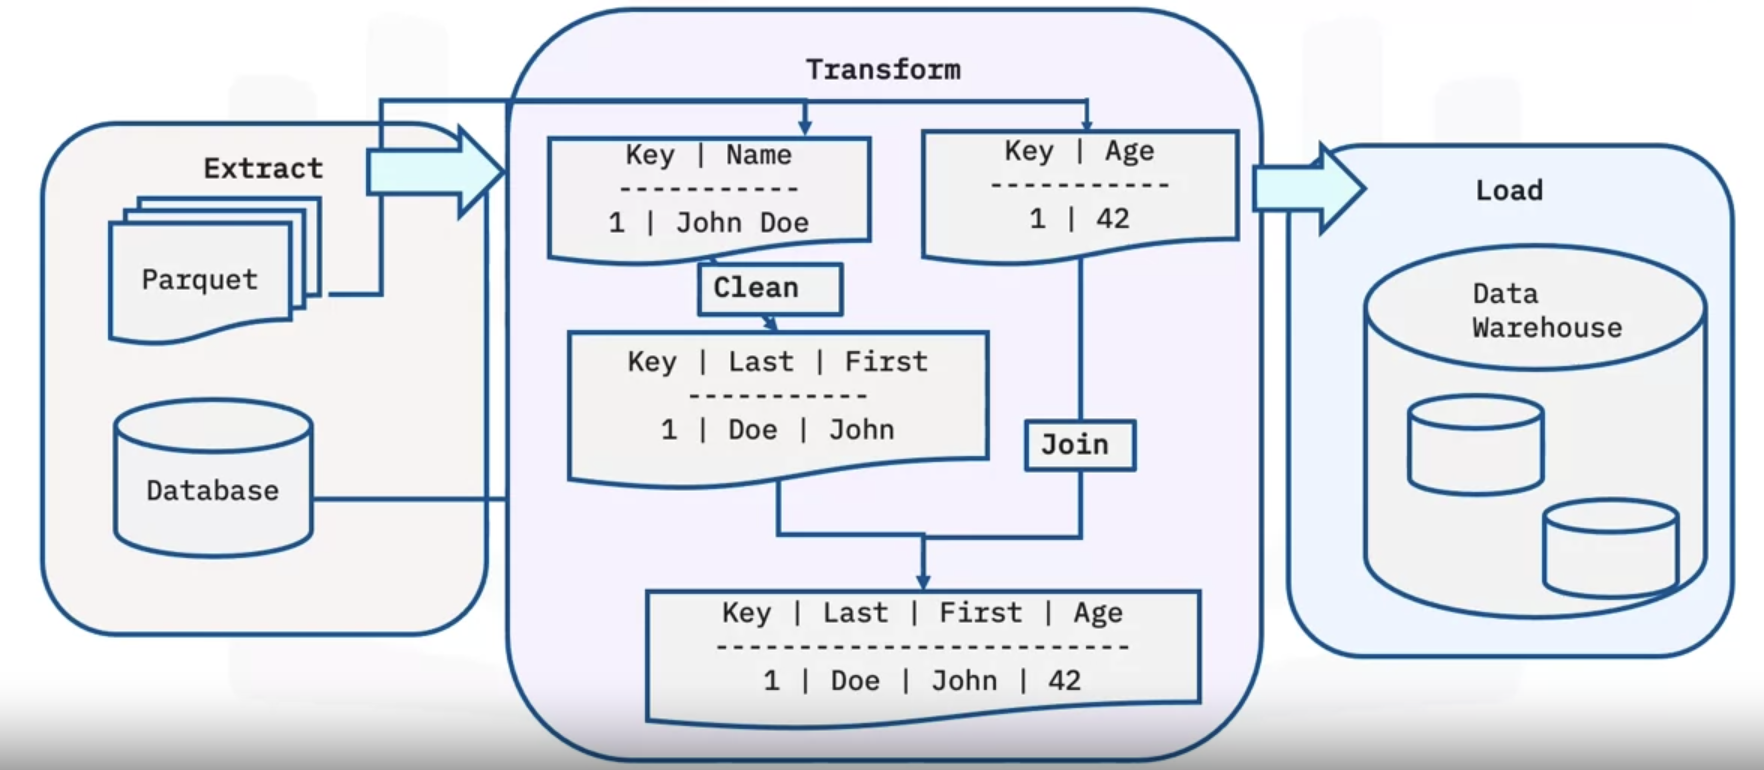

In [ ]:
Image('ETL Example.png')

# Week 2: SparkML

**Spark ML Library (MLlib):**

* Spark ML lib comes prepackaged with standard machine learning algorithms for clustering, classification, regression
* Featurization with Functions that easily extract features of interest from raw data, including functions for feature extraction, dimensionality reduction, and string tokenization
* Functions
  * Pipelines: Spark ML lib exposes a pipeline API that makes the machine learning end-to-end system easier to develop, train and deploy.
  * Persistence: beneficial for models trained on large datasets that require multiple training checkpoints
  * Utilities: functions from statistics, linear algebra, image processing, and others

**SparkML Data Sources:**

* Parquet
* CSV
* JSON
* JDBC
* Others
* Has special libraries to support images and LIBSVM data types
* Supports both feature vector and label column data


**SparkML Built in Utilties:**

* Linear Algebra (spark.ml.linalg): used for basic linear algebra data holders such as matrices and vectors
* Statistics (spark.ml.stat): used for statistics operations such as correlation, hypothesis testing, summarizing, etc.
* Feature (spark.ml.feature): powerful toolbox to convert raw data into useful features for ML model fitting

In [ ]:
#Correlation Utility Example:

from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

#Creates Vectors

data = [(Vectors.sparse (4, [(0, 1.0), (3, -2.0)]),),
  (Vectors. dense ([4.0, 5.0, 0.0, 3.0]),),
  (Vectors. dense ([6.0, 7.0, 0.0, 8.0]),),
  (Vectors. sparse(4, [(0, 9.0), (3, 1.0)]) ,)]

#Creates a DataFrame on Vector

df = spark.createDataFrame (data, ["features"])

#Finds Correlation

r1 = Correlation.corr(df, "features").head ()

**SparkML Pipelines**

* Exposes a single Spark ML pipeline API
* Combines multiple algorithms into a single workflow or pipeline using Transformers and Estimators as building blocks

**Supervised Learning:**

* Learns from Data and Labels (supervision)
* Explicit labeling of data imparts the “supervision” aspect to supervised learning

**Classification (Type of Supervised Learning):**

* Produces a prediction from a discrete set of possible outcomes
* The model predicts each object's target category or "class"
* Examples:
  * Predicting a sports tournament winner
  * heads or tails on a coin toss
  * Classifying images with a pre-set number of distinct categories
* Classification - spark.ml.classification library includes:
  * Logistic regression classifier
  * Decision trees
  * random forests
  * multilayer perceptron
  * support vector machines (SVM)
  * Naive Bayes,
  * One-versus-all classifiers

**Regression (Type of Supervised Learning):**
* Regression is a form of an implicit function approximation where the model predicts real valued outputs for a given input
* The predicted value is usually a continuous real number, such as a float or integer
* Examples
  * Weather predictions
  * Stock market price predictions
  * House value estimation
* Regression - spark.ml.regression library includes:
  * Linear regression
  * Generalized linear regression
  * Decision tree and random forest regression
  * Survival regression
  * Isotonic regression algorithms

**Unsupervised Learning:**
* Does not require explicit labels mapped to features
* Automatically learns patterns and latent spaces in the data
* Generally more complex than Supervised Learning
* Examples:
  * Clustering
  * Recommender Systems

**Clustering (Type of Unsupervised Learning):**

* Groups data into clusters
* All elements within a cluster share similar characteristics
* Clustering - spark.ml.clustering library includes:
  *K-means
  * Latent Dirichlet Allocation
  *Gaussian Mixture Models

In [ ]:
# k-means example

from pyspark.ml.clustering import Kmeans

# Load data
data = spark.read.format("libsvm").load ("data.txt")

# Create a model and train it
kmeans = KMeans().setK(5)
model = kmeans.fit(data)

# Perform predictions on test data
test_data = spark.read.format("libsvm").load("test_ data.txt")
predictions = model.transform (test_data)

#Techincal

CLAIM: Component Library for Machine Learning, ETL and Data Science

Comparison of a typical juypyter notebook running a SQL statement from a PostgresSQL database and storing the result to a CSV file:

1. Import appropriate libraries
2. Create connector to connect to the postgres server
3. Code appropriate Python cells to create pipeline to use Select statements to find relevant data
4. Code appropriate Python cells to output data into csv

CLAIM:

Typical Jupyter Diagram with CLAIM:

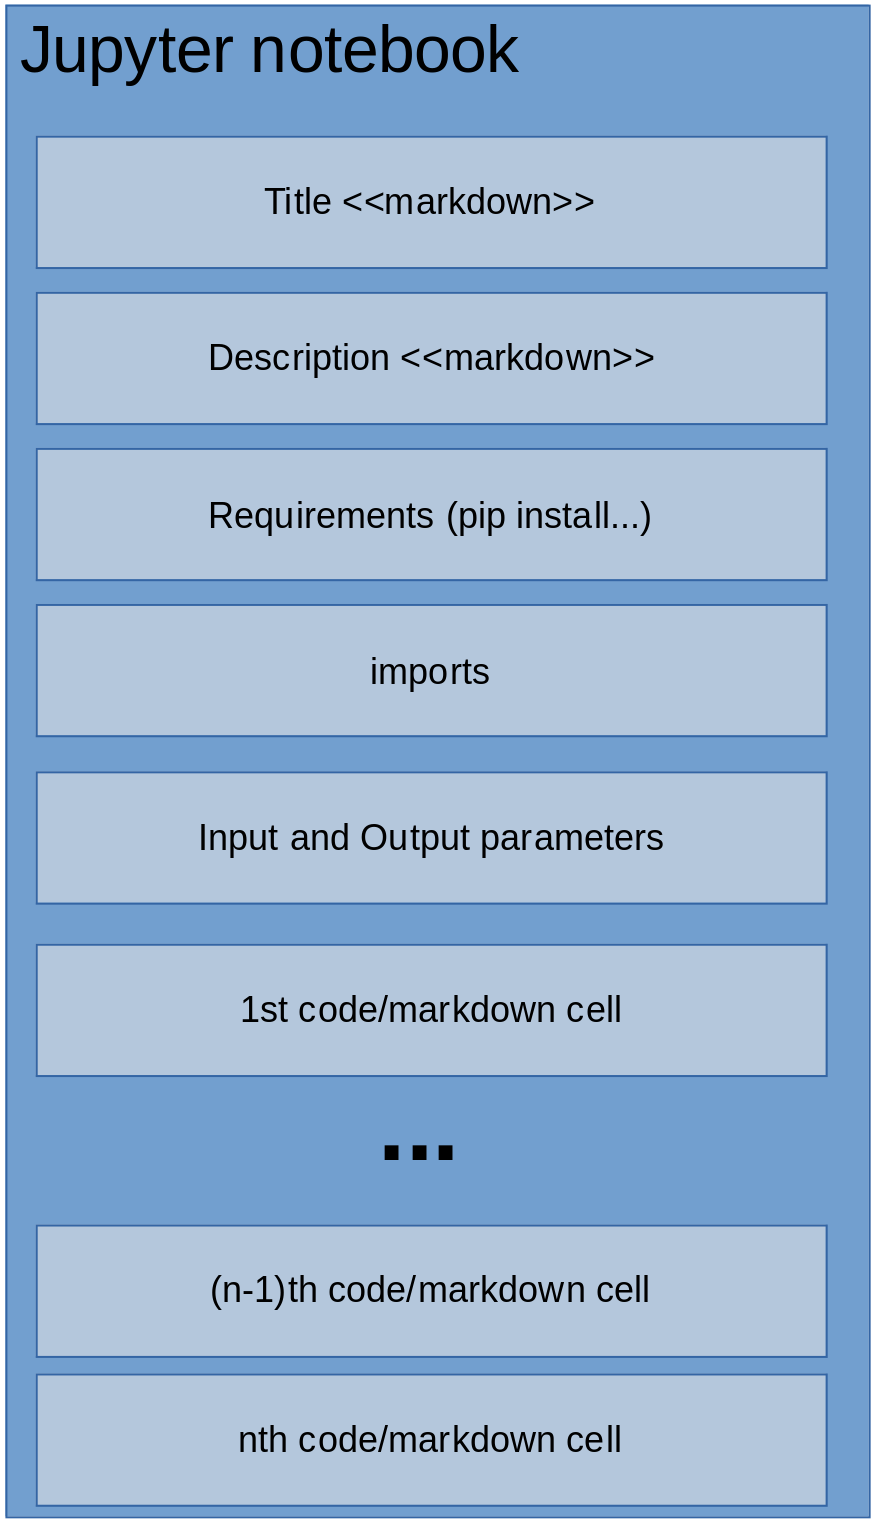

Diagram Explained:

Cell 1

Title / name of the component (e.g. input-postgresql) (as markdown cell type)

Cell 2

Description of the component (as markdown cell type)

Cell 3

Requirements of the component — this cell need to contain code for installing requirements via pip or conda

Cell 4

All imports needed for execution of this notebook

Cell 5

Input / Output parameters — this cell type is the most complex as it defines all variables the component needs during runtime. So in case of the PostgreSQL connector the database host, user name and password for examples

Cell 6+

All subsequent cells are freely usable by the creator of the component. The only thing one have to remember if the component is not a Sink (last processing step in a pipeline) it needs to pass on data to the next component. This is called the “components output”. The name and type of the component’s output is also defined in Cell 4 (by having it’s environment variable name start with “output_”), so the only thing which needs to be done is to write the result to a file as specified in Cell 4 after all processing is done.

Example:


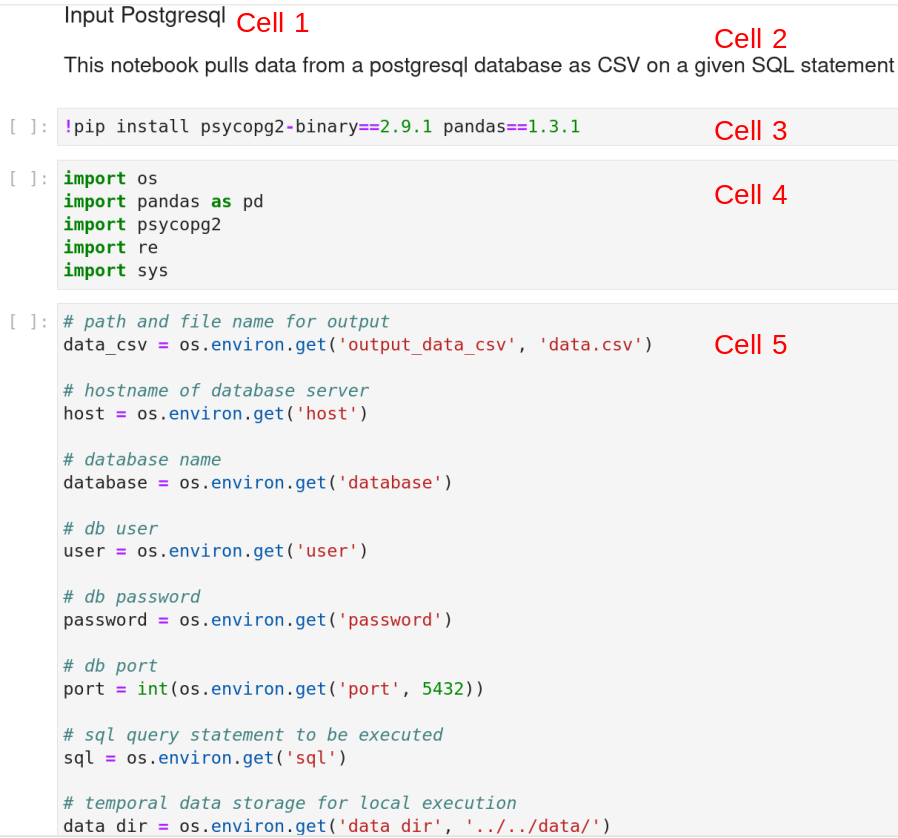

Cell 1

Here you can see the title of the component: “Input PostgreSQL” in markdown.

Cell 2

Here you can see the description of the component in markdown.

Cell 3

The ‘!’ symbol turns this command into a shell command which installs the requirements of this notebook using “pip”

Cell 4

All required imports

Cell 5

This is the most important cell as it exposes the interface to the component by defining it’s parameters. This configuration looks like pure python code and it actually is. Using design by contract the following rules are used to define different aspects of the configuration.

You are able to create no/low code pipelines in the notebook and set environmental variables.

In this case, the variables are being set on the postgres node:

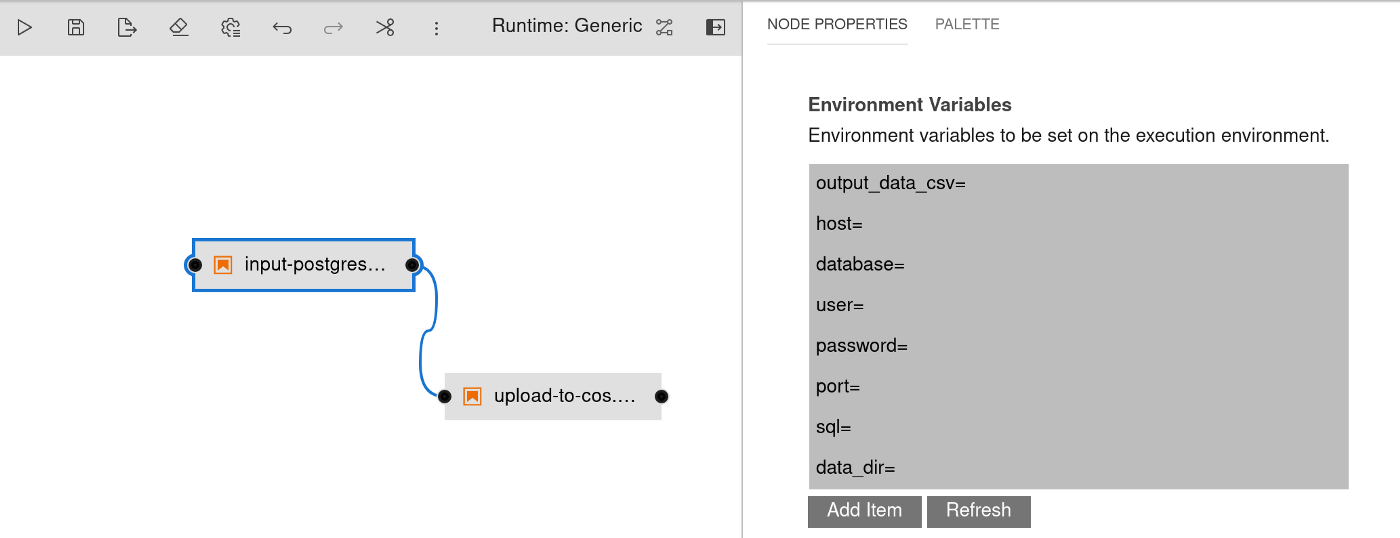

In [ ]:
#Example of if you do not want to use the GUI:

ipython ./claimed/component-library/input/input-postgresql.ipynb output_data_csv=”data.csv” host=”16e2db05–7f52–4eff-b9e6-a10b27b2a708.c13p25pf03djhc8of4jg.databases.appdomain.cloud” database=”ibmclouddb” user=”ibm_cloud_ca376820_b7b6_49a6_ae14_4fad47b544ad” password=”19559511787fe054cb260489708424c244ea4085” port=”32474” sql=”select * from public.test” data_dir=”/tmp/data/”

Link to Juypter Notebook using CLAIM:

[Link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/labs/etl_lab.ipynb)